# Lab: K-Means Clustering on Diabetes Dataset
**Name:** Aayush Suthar  
**Reg No:** 23FE10CAI00275  
**Section:**  5 F

---
### Aim

To implement and visualize K-Means clustering on the Diabetes dataset and determine optimal clusters using the Elbow Method.

---
### Objectives
- Understand unsupervised learning
- Apply K-Means to identify patient groups
- Find optimal K using elbow method
- Visualize clusters
---
### Theory: K-Means Clustering (Short)

K-Means is an unsupervised clustering algorithm that groups data into K clusters based on similarity. It assigns each point to the nearest cluster center (centroid) and updates centroids until they stop moving.

Key Steps
	1.	Choose number of clusters K
	2.	Initialize K centroids
	3.	Assign each point to nearest centroid
	4.	Update centroids as mean of assigned points
	5.	Repeat until convergence

### Objective

	•	Uses Euclidean distance
	•	Works best when clusters are well-separated
	•	Elbow Method is used to choose K (here K = 3,5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv('Diabetes Cleaned.csv')
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


---
### Select Features (Glucose & BMI)

In [3]:
X = df[['Glucose', 'BMI']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---
### Elbow Method

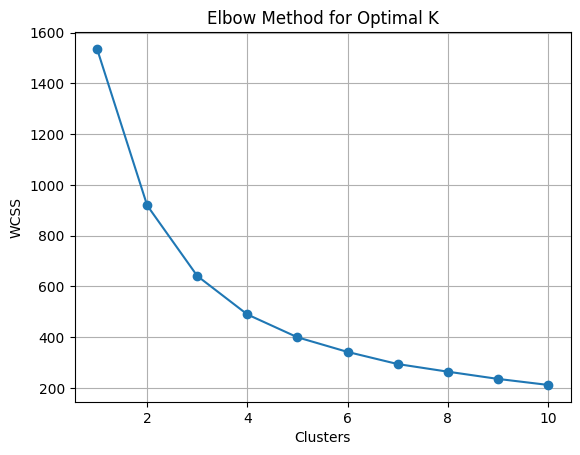

In [4]:
wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

---
### Apply K-Means (K=3)

In [5]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,Cluster
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0,0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0,2
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0,0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0,2
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0,1


---
### Apply K-Means (K=5)

In [7]:
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,Cluster
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0,4
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0,3


---
### Visualize Clusters K-Means (K=3)

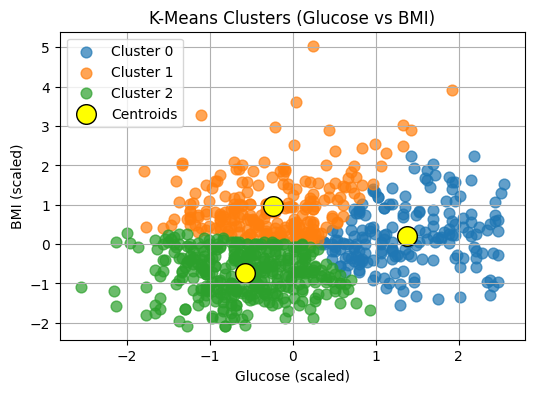

In [6]:
colors=['red','green','blue']

plt.figure(figsize=(6,4))
for i in range(3):
    plt.scatter(X_scaled[clusters==i,0], X_scaled[clusters==i,1], s=60, label=f'Cluster {i}', alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', edgecolor='black', label='Centroids')
plt.title('K-Means Clusters (Glucose vs BMI)')
plt.xlabel('Glucose (scaled)')
plt.ylabel('BMI (scaled)')
plt.legend()
plt.grid(True)
plt.show()

---
### Visualize Clusters K-Means (K=5)

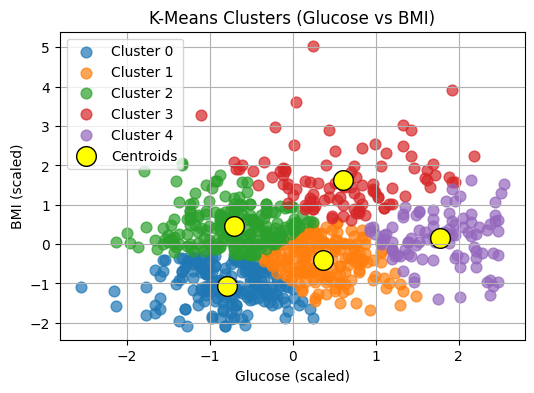

In [8]:
colors=['red','green','blue']

plt.figure(figsize=(6,4))
for i in range(5):
    plt.scatter(X_scaled[clusters==i,0], X_scaled[clusters==i,1], s=60, label=f'Cluster {i}', alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', edgecolor='black', label='Centroids')
plt.title('K-Means Clusters (Glucose vs BMI)')
plt.xlabel('Glucose (scaled)')
plt.ylabel('BMI (scaled)')
plt.legend()
plt.grid(True)
plt.show()

---
### Conclusion
K-Means grouped patients based on **Glucose** and **BMI** levels.
- **High Glucose, High BMI → High diabetes risk group**
- **Moderate Glucose & BMI → Medium risk**
- **Low Glucose & BMI → Low risk**

Thus, K-Means is useful for medical risk segmentation and early diagnosis strategies.

---